Approach

1. Load the dataset and Libraries
2. Visualize the data
3. Initialize and Sequential Model
4. Set up the Layers (Dense, Dropout, Conv2d, Pooling)
5. Compile the model
6. Fit the model
7. Evaluate the Model

Unzip the File

In [52]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fashion-mnist_test.csv  
replace fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fashion-mnist_train.csv  
replace t10k-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: t10k-images-idx3-ubyte  
replace t10k-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: t10k-labels-idx1-ubyte  
replace train-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train-images-idx3-ubyte  
replace train-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train-labels-idx1-ubyte  


Load the Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf


In [53]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [54]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
train.shape

(60000, 785)

In [57]:
test.shape

(10000, 785)

In [58]:
len(train)

60000

Visualize the Data

Run the code multiple times to generate different pics and test

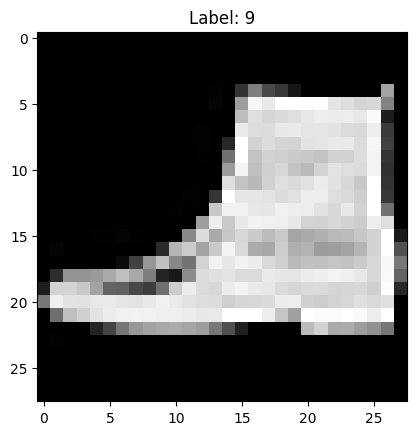

In [59]:
# prompt: visualize the pixels in the dataset

# Select a random image from the training dataset
image_index = np.random.randint(0, len(train))
image = train.iloc[image_index, 1:].values.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {train.iloc[image_index, 0]}")
plt.show()

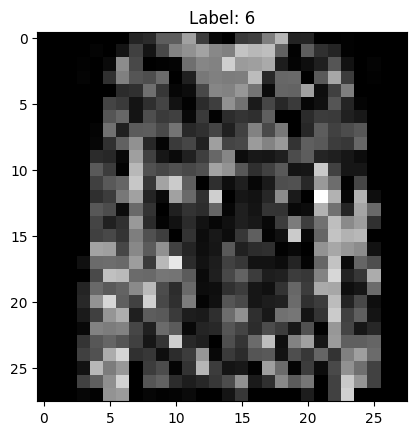

In [35]:
# prompt: visualize the pixels in the dataset

# Select a random image from the training dataset
image_index = np.random.randint(0, len(train))
image = train.iloc[image_index, 1:].values.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {train.iloc[image_index, 0]}")
plt.show()

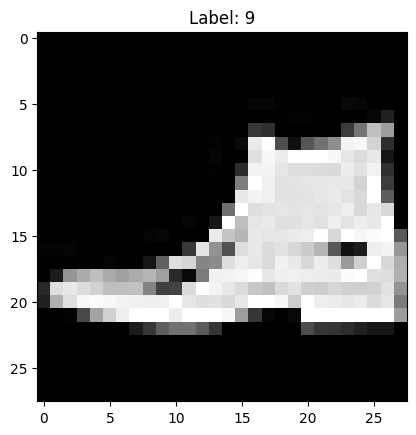

In [36]:
# prompt: visualize the pixels in the dataset

# Select a random image from the training dataset
image_index = np.random.randint(0, len(train))
image = train.iloc[image_index, 1:].values.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {train.iloc[image_index, 0]}")
plt.show()

Output Comparision

Each training and test example is assigned to one of the following labels:



*   0 - T-Shirt
*   1 - Trouser
*   2 - Pull Over
*   3 - Dress
*   4 - Coat
*   5 - Sandal
*   6 - Shirt
*   7 - Sneaker
*   8 - Bag
*   9 - Ankle Boot

Image and Labels

In [60]:
x = train.drop('label', axis=1)
y = train['label']

Split the data into train, test

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


Initialize the model and sequential layers

In [63]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784,))) # Layer 1
model.add(Dense(64, activation = 'relu')) # Layer 2
model.add(Dense(64, activation = 'relu'))# Layer 3
model.add(Dense(10, activation = 'softmax')) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

Input layer - 784 * 64 + 64 bias parameters = 50240
Layer 1 - 64 * 64 + 64 = 4160

In [65]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

we need to encode output or else it will be considered as Regression problem

In [66]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [68]:
hist = model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6692 - loss: 4.0941 - val_accuracy: 0.7759 - val_loss: 0.6992
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7919 - loss: 0.6215 - val_accuracy: 0.7715 - val_loss: 0.6735
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8109 - loss: 0.5439 - val_accuracy: 0.8081 - val_loss: 0.5461
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8245 - loss: 0.4987 - val_accuracy: 0.8273 - val_loss: 0.4751
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8343 - loss: 0.4683 - val_accuracy: 0.8174 - val_loss: 0.4982
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8351 - loss: 0.4550 - val_accuracy: 0.8397 - val_loss: 0.4551
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8445 - loss: 0.4261 - val_accuracy: 0.8487 - val_loss: 0.4212
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8565 - loss: 0.4075 -

acccuracy is train_accuracy, val_accuracy is Test accuracy

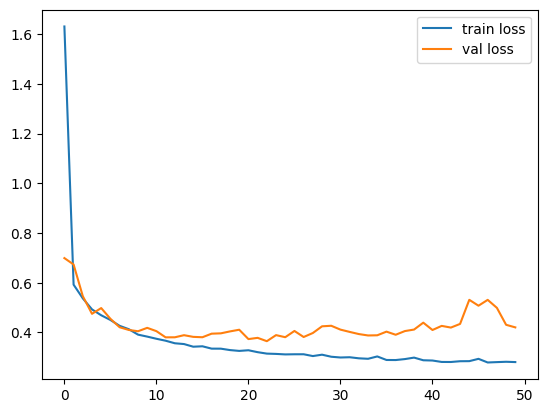

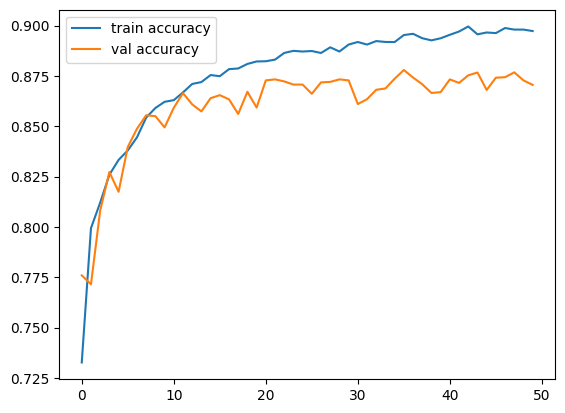

In [69]:
# Plot the training and validation loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

Evaluation Metrics

In [70]:
def model_eval(actual, predicted):
    print('Accuracy Score:', accuracy_score(actual, predicted))
    print('Confusion Matrix:\n', confusion_matrix(actual, predicted))
    print('Classification Report:\n', classification_report(actual, predicted))

Y-Hat or Predicted values

In [72]:
y_hat_train = np.argmax(model.predict(x_train), axis = 1)
y_hat_test = np.argmax(model.predict(x_test), axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [73]:
model_eval(y_train, y_hat_train)

Accuracy Score: 0.903125
Confusion Matrix:
 [[4050    0   83  133   15    0  476    0   11    0]
 [   9 4734    3   54    5    0   15    0    6    0]
 [  51    0 3985   30  486    0  239    0    9    0]
 [ 102    0   73 4271  235    0   76    0    1    0]
 [   6    1  348   75 4214    0  168    0    3    0]
 [   0    0    1    0    0 4817    2   24    0   15]
 [ 533    1  378  109  418    0 3294    2   22    0]
 [   0    0    0    0    0   20    0 4687    0   69]
 [  11    0   21   20   43    2   73   12 4669    0]
 [   0    0    0    0    0    1    0  158    2 4629]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4768
           1       1.00      0.98      0.99      4826
           2       0.81      0.83      0.82      4800
           3       0.91      0.90      0.90      4758
           4       0.78      0.88      0.82      4815
           5       1.00      0.99      0.99      4859
           6       0.7